In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the display width to a larger value (e.g., 200 characters)
pd.set_option('display.width', 200)

# Allow each column to display more content without truncation
pd.set_option('colheader_justify','center','display.max_colwidth', None)

In [2]:
# Data to be worked with
obs_df = pd.read_csv("observations.csv")
spec_df = pd.read_csv("species_info.csv")

# merge dataframes into one and reset the index
merged = pd.merge(obs_df, spec_df[['scientific_name','category','conservation_status']], on='scientific_name').sort_values(by='park_name', ascending=True).reset_index().drop(columns='index')

# easier to reference park list get rid of all ' National Park' to make it look slightly better for charts
merged['park_name'] = merged['park_name'].str.replace('National Park', '').str.strip()
merged = merged.drop_duplicates()
park_l = merged.park_name.unique()

print(park_l)
print(merged.head())
print(merged.conservation_status.unique())

['Bryce' 'Great Smoky Mountains' 'Yellowstone' 'Yosemite']
     scientific_name    park_name  observations     category    conservation_status
0       Elanus leucurus    Bryce         71                Bird  Species of Concern
1  Leucanthemum vulgare    Bryce         91      Vascular Plant                 NaN
2        Rallus elegans    Bryce         53                Bird  Species of Concern
3  Leucanthemum vulgare    Bryce        116      Vascular Plant                 NaN
5     Calochortus albus    Bryce         47      Vascular Plant                 NaN
['Species of Concern' nan 'Endangered' 'In Recovery' 'Threatened']


In [3]:
# Create independent data frame from merged df that shows count of unique entries for scientific_name, total observations, count of entries for conservation_status and a percentage
# of count of conservation status out of the number of unique species
data = {'category': merged.category.unique(), 'species_count' : list(merged.groupby('category').scientific_name.nunique()), 'total_observations': list(merged.groupby('category').observations.sum()),
       'conservation_status_count': list(merged.groupby('category').conservation_status.count())}
df = pd.DataFrame(data)
df['percent_conservation_status'] = round(df['conservation_status_count'] / df['species_count'] * 100, 1)
print(df)

       category       species_count  total_observations  conservation_status_count  percent_conservation_status
0               Bird        79               43971                   28                        35.4            
1     Vascular Plant       488              292578                  316                        64.8            
2          Amphibian       125               71631                   48                        38.4            
3               Fish       176              117155                  164                        93.2            
4            Reptile       333              190653                   20                         6.0            
5             Mammal        78               44678                   20                        25.6            
6  Nonvascular Plant      4262             2553291                  184                         4.3            


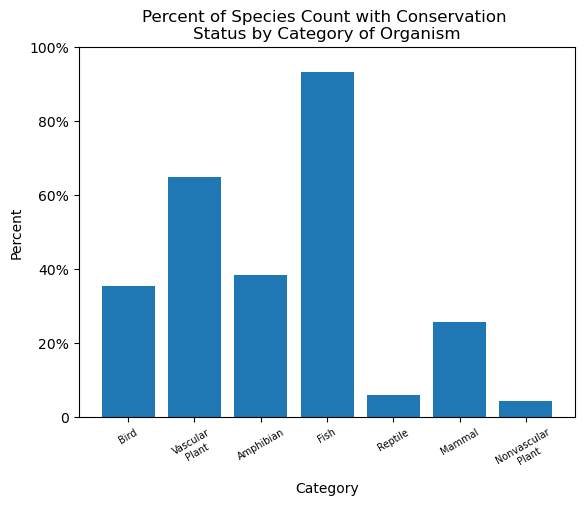

<Figure size 640x480 with 0 Axes>

In [10]:
chart = df['percent_conservation_status']
ax = plt.subplot()
plt.bar(range(len(chart)), chart)
plt.title('''Percent of Species Count with Conservation 
Status by Category of Organism''')
plt.xlabel('Category')
plt.ylabel('Percent')
ax.set_xticks(range(len(chart)))
ax.set_xticklabels(df['category'].str.replace(' ','\n'), rotation = 30, fontsize = 7)
ax.set_yticks(range(0,101,20))
ax.set_yticklabels(['0','20%','40%','60%','80%','100%'])
plt.show()
plt.clf()

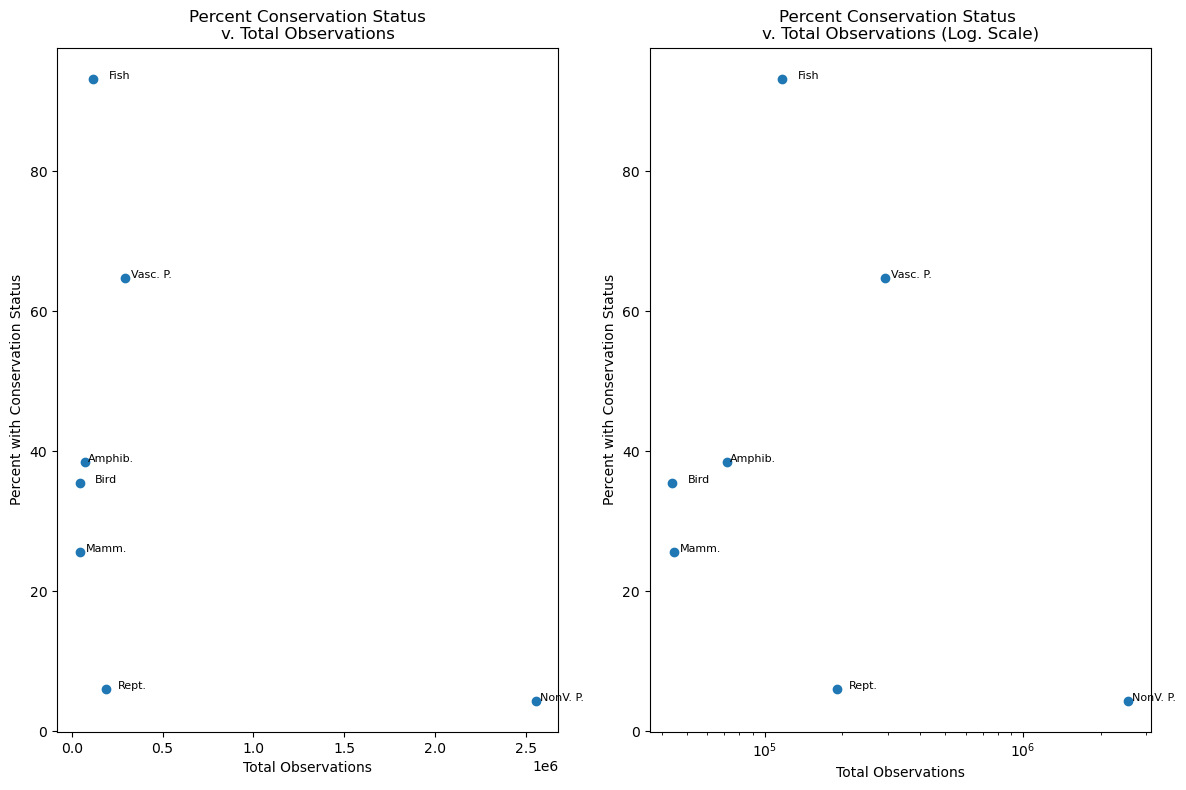

In [58]:
# Create subplots with a larger figure size
fig, axs = plt.subplots(1, 2, figsize=(12, 8))  # 2x2 grid, larger figure size
ax = plt.subplot(1,2,1)
plt.scatter(df.total_observations, df.percent_conservation_status)
plt.title('''Percent Conservation Status
v. Total Observations''')
plt.xlabel('Total Observations')
plt.ylabel('Percent with Conservation Status')
# Add labels to each point
for x, y, label in zip(df['total_observations'], df['percent_conservation_status'], ['Bird', 'Vasc. P.', 'Amphib.', 'Fish', 'Rept.', 'Mamm.', 'NonV. P.']):
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(19, 0), ha='center', fontsize = 8)


ax1 = plt.subplot(1,2, 2)
plt.scatter(df.total_observations, df.percent_conservation_status)
plt.title('''Percent Conservation Status 
v. Total Observations (Log. Scale)''')
plt.xlabel('Total Observations')
plt.ylabel('Percent with Conservation Status')
ax1.set_xscale('log')
# Add labels to each point
for x, y, label in zip(df['total_observations'], df['percent_conservation_status'], ['Bird', 'Vasc. P.', 'Amphib.', 'Fish', 'Rept.', 'Mamm.', 'NonV. P.']):
    ax1.annotate(label, (x, y), textcoords="offset points", xytext=(19, 0), ha='center', fontsize = 8)

# plt.subplots_adjust(wspace = .8)
plt.tight_layout()
plt.show()

In [ ]:
# If I am understanding the data correctly: the number of unique species for each category was counted and of those individual species, the conservation status (i.e., where the conservation thereof is 
# of a degree of concern*) was counted. The data displayed is the percentage (Consevation Status Count / Species Count * 100) of species of concern in terms of conservation. The second pair of graphs
# show that the total number of observations or presumed number of organisms does not seem to correlate to the percentage with conservation status. Ergo, more or less populous does not mean a species
# is more or less likely to be one with a conservation status. 

# side note, in a presentation, I'd likely get some feedback on what truncated labels would be most acceptable for the charts.

# *Though, I suppose, technically lack of concern for conservation is still a 'status'. I'd need some help to frame the description of the data in the appropriate language 
# for an audience of experts